In [5]:
import pandas as pd

# Load the dataset from a CSV file 
data = pd.read_csv(r"C:\Users\Admin\Desktop\Incident-based crime statistics\Crime statistics.csv")

# Rename columns
data.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Province',
    'Statistics': 'Measure',
    'UOM': 'Unit',
    'VALUE': 'Value'
}, inplace=True)

# Delete rows where Province is "Canadian Forces Military Police [99001]"
data = data[data['Province'] != "Canadian Forces Military Police [99001]"]

# Remove the numeric code from province names
data['Province'] = data['Province'].str.replace(r'\s*\[\d+\]', '', regex=True)

# Get unique values of Province column
unique_provinces = data['Province'].unique()

# Print the unique province values
print(unique_provinces)


['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories' 'Nunavut']


In [42]:
print(data.head())

import pandas as pd

# Load your dataset
# Assuming you've loaded your dataset into a variable called 'data'

# Check for duplicates
duplicates_exist = data.duplicated()

# Print the count of duplicates
print("Number of duplicate rows:", duplicates_exist.sum())

# If there are duplicates, you can print the duplicate rows
if duplicates_exist.any():
    duplicate_rows = data[duplicates_exist]
    print("Duplicate rows:")
    print(duplicate_rows)

   Year                   Province           Measure    Unit    Value
0  2012  Newfoundland and Labrador  Actual incidents  Number  36024.0
1  2013  Newfoundland and Labrador  Actual incidents  Number  35217.0
2  2014  Newfoundland and Labrador  Actual incidents  Number  32842.0
3  2015  Newfoundland and Labrador  Actual incidents  Number  33645.0
4  2016  Newfoundland and Labrador  Actual incidents  Number  34416.0
Number of duplicate rows: 0


In [7]:
# Count the number of missing values in the 'Value' column
missing_values_count = data['Value'].isna().sum()

# Print the count of missing values
print("Number of missing values in the 'Value' column:", missing_values_count)


Number of missing values in the 'Value' column: 130


In [8]:
# Fill blank values in the 'Value' column with zeros
data['Value'].fillna(0, inplace=True)


In [9]:
# Fill blank values in the 'Value' column with zeros
data['Value'].fillna(0, inplace=True)

# Count the number of missing values in the 'Value' column
missing_values_count = data['Value'].isna().sum()

# Print the count of missing values
print("Number of missing values in the 'Value' column:", missing_values_count)


Number of missing values in the 'Value' column: 0


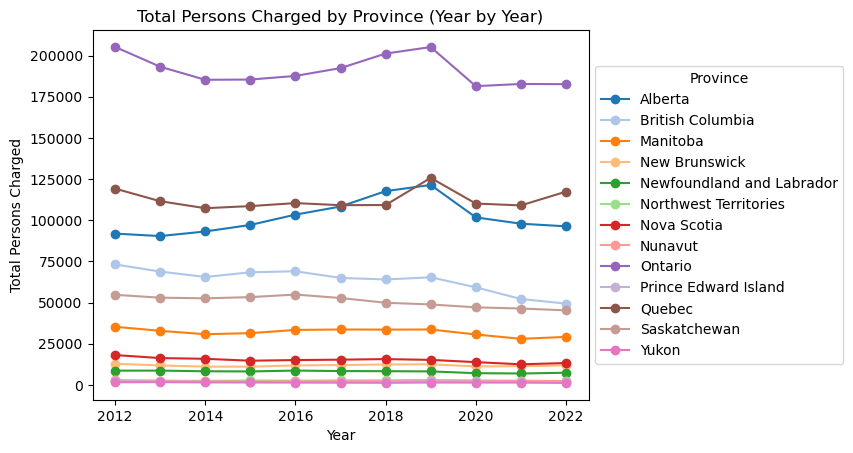

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for color palette

# Filter the data for the "Total, persons charged" measure
total_persons_charged = data[data['Measure'] == 'Total, persons charged']

# Group the data by Province and Year
grouped = total_persons_charged.groupby(['Province', 'Year'])['Value'].sum().reset_index()

# Pivot the data for plotting
pivot_data = grouped.pivot(index='Year', columns='Province', values='Value')

# Define a unique color palette using Seaborn's default color palette
color_palette = sns.color_palette('tab20', n_colors=len(pivot_data.columns))

# Create the line graph with the unique color palette
ax = pivot_data.plot(kind='line', marker='o', color=color_palette)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Persons Charged')
plt.title('Total Persons Charged by Province (Year by Year)')

# Move the legend to the far right
ax.legend(title='Province', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()





<Figure size 1200x800 with 0 Axes>

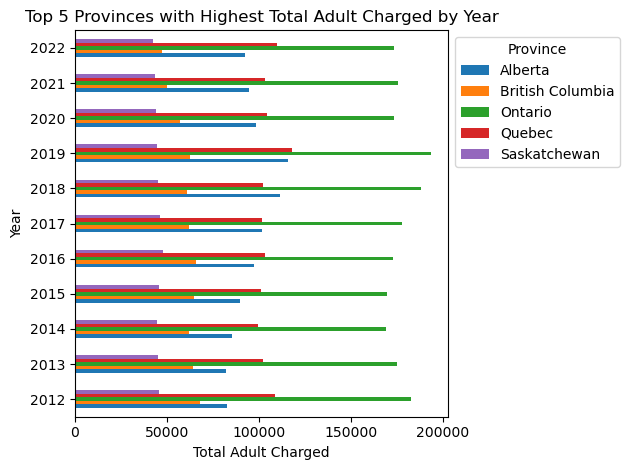

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the "Total, adult charged" measure
total_adult_charged = data[data['Measure'] == 'Total, adult charged']

# Group the data by Year and Province and get the maximum values for each year
max_adult_charged_per_year = total_adult_charged.groupby(['Year', 'Province'])['Value'].max().reset_index()

# Find the top 5 provinces with the maximum adult charged for each year
top_provinces_per_year = max_adult_charged_per_year.groupby('Year').apply(lambda x: x.nlargest(5, 'Value')).reset_index(drop=True)

# Pivot the data for plotting
pivot_data = top_provinces_per_year.pivot(index='Year', columns='Province', values='Value')

# Create a color palette for the provinces
color_palette = sns.color_palette('tab10', n_colors=len(pivot_data.columns))

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='barh', color=color_palette)

plt.xlabel('Total Adult Charged')
plt.ylabel('Year')
plt.title('Top 5 Provinces with Highest Total Adult Charged by Year')
plt.legend(title='Province', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_42180\3997736366.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, 5))


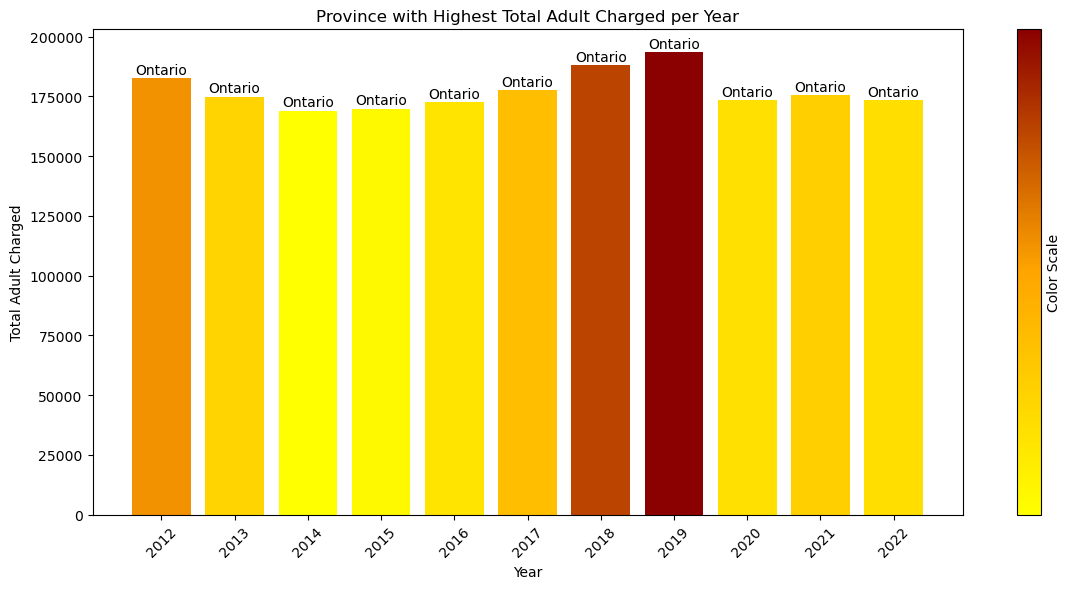

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Filter the data for the "Total, adult charged" measure
total_adult_charged = data[data['Measure'] == 'Total, adult charged']

# Group the data by Year and Province and get the maximum value for each year
max_adult_charged_per_year = total_adult_charged.groupby(['Year', 'Province'])['Value'].max().reset_index()

# Find the province with the maximum adult charged for each year
max_province_per_year = max_adult_charged_per_year.loc[max_adult_charged_per_year.groupby('Year')['Value'].idxmax()]

# Create a custom gradient colormap from yellow to dark red
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#FFFF00', '#FFA500', '#8B0000'])

# Normalize the data for color mapping
normalize = mcolors.Normalize(vmin=max_province_per_year['Value'].min(), vmax=max_province_per_year['Value'].max())

# Create a bar plot with custom colormap and normalized color mapping
plt.figure(figsize=(12, 6))
bars = plt.bar(max_province_per_year['Year'], max_province_per_year['Value'], color=cmap(normalize(max_province_per_year['Value'])))

plt.xlabel('Year')
plt.ylabel('Total Adult Charged')
plt.title('Province with Highest Total Adult Charged per Year')
plt.xticks(max_province_per_year['Year'], rotation=45)
plt.tight_layout()

# Annotate the province names on the bars
for i, bar in enumerate(bars):
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value + 500, max_province_per_year['Province'].iloc[i], ha='center', va='bottom')

# Show the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, 5))
cbar.set_label('Color Scale')

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_42180\232668156.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, 5))


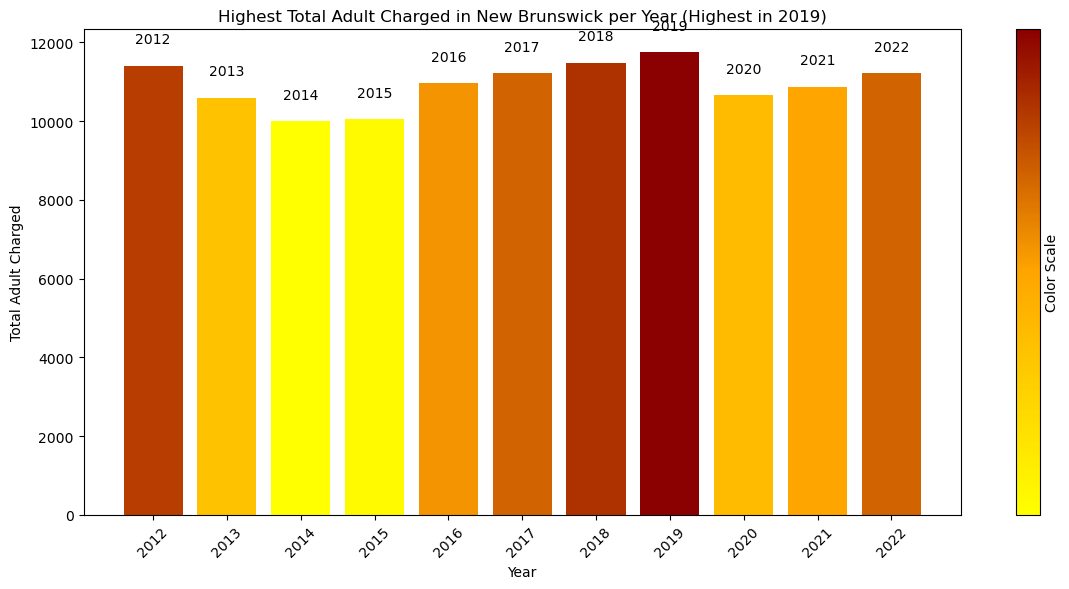

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Filter the data for the "Total, adult charged" measure and New Brunswick province
total_adult_charged_nb = total_adult_charged[total_adult_charged['Province'] == 'New Brunswick']

# Group the data by Year and Province and get the maximum value for each year
max_adult_charged_nb_per_year = total_adult_charged_nb.groupby(['Year', 'Province'])['Value'].max().reset_index()

# Find the year with the maximum adult charged for New Brunswick
max_year_nb = max_adult_charged_nb_per_year.loc[max_adult_charged_nb_per_year['Value'].idxmax()]['Year']

# Create a custom gradient colormap from yellow to dark red
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#FFFF00', '#FFA500', '#8B0000'])

# Normalize the data for color mapping
normalize = mcolors.Normalize(vmin=max_adult_charged_nb_per_year['Value'].min(), vmax=max_adult_charged_nb_per_year['Value'].max())

# Create a bar plot with custom colormap and normalized color mapping
plt.figure(figsize=(12, 6))
bars = plt.bar(max_adult_charged_nb_per_year['Year'], max_adult_charged_nb_per_year['Value'], color=cmap(normalize(max_adult_charged_nb_per_year['Value'])))

plt.xlabel('Year')
plt.ylabel('Total Adult Charged')
plt.title(f'Highest Total Adult Charged in New Brunswick per Year (Highest in {max_year_nb})')
plt.xticks(max_adult_charged_nb_per_year['Year'], rotation=45)
plt.tight_layout()

# Annotate the year on the bar with the highest value
for i, bar in enumerate(bars):
    year = max_adult_charged_nb_per_year['Year'].iloc[i]
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value + 500, f'{year}', ha='center', va='bottom')

# Show the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, 5))
cbar.set_label('Color Scale')

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

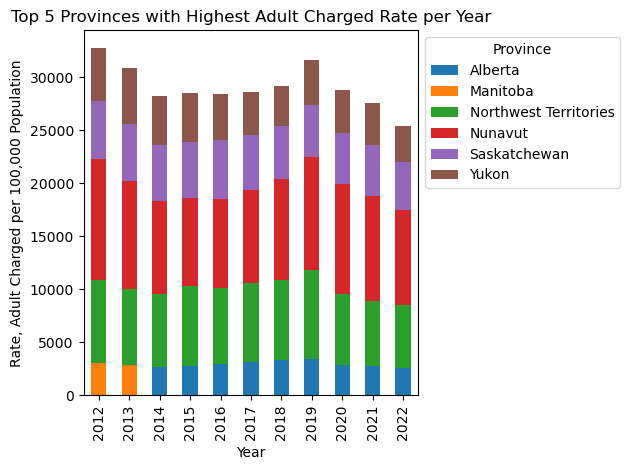

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the "Rate, adult charged per 100,000 population aged 18 years and over" measure
rate_adult_charged = data[data['Measure'] == 'Rate, adult charged per 100,000 population aged 18 years and over']

# Group the data by Year and Province and get the maximum values for each year
max_rate_per_year = rate_adult_charged.groupby(['Year', 'Province'])['Value'].max().reset_index()

# Find the top 5 provinces with the maximum rate for each year
top_provinces_per_year = max_rate_per_year.groupby('Year').apply(lambda x: x.nlargest(5, 'Value')).reset_index(drop=True)

# Pivot the data for plotting
pivot_data = top_provinces_per_year.pivot(index='Year', columns='Province', values='Value')

# Create a color palette for the provinces
color_palette = sns.color_palette('tab10', n_colors=len(pivot_data.columns))

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, color=color_palette)

plt.xlabel('Year')
plt.ylabel('Rate, Adult Charged per 100,000 Population')
plt.title('Top 5 Provinces with Highest Adult Charged Rate per Year')
plt.legend(title='Province', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

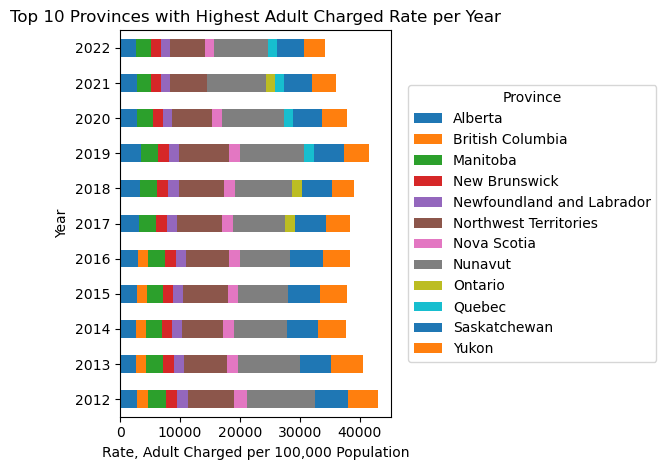

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the "Rate, adult charged per 100,000 population aged 18 years and over" measure
rate_adult_charged = data[data['Measure'] == 'Rate, adult charged per 100,000 population aged 18 years and over']

# Group the data by Year and Province and get the maximum values for each year
max_rate_per_year = rate_adult_charged.groupby(['Year', 'Province'])['Value'].max().reset_index()

# Find the top 10 provinces with the maximum rate for each year
top_provinces_per_year = max_rate_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Value')).reset_index(drop=True)

# Pivot the data for plotting
pivot_data = top_provinces_per_year.pivot(index='Year', columns='Province', values='Value')

# Create a color palette for the provinces
color_palette = sns.color_palette('tab10', n_colors=len(pivot_data.columns))

# Create the horizontal stacked bar plot with adjusted graph and legend sizes
plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='barh', stacked=True, color=color_palette)

plt.xlabel('Rate, Adult Charged per 100,000 Population')
plt.ylabel('Year')
plt.title('Top 10 Provinces with Highest Adult Charged Rate per Year')

# Adjust the size of the legend area
plt.legend(title='Province', bbox_to_anchor=(1.04, 0.5), loc='center left')

# Show the plot
plt.tight_layout()
plt.show()





C:\Users\Admin\AppData\Local\Temp\ipykernel_42180\1194604652.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('YlOrRd', 10)  # 10 levels of light yellow


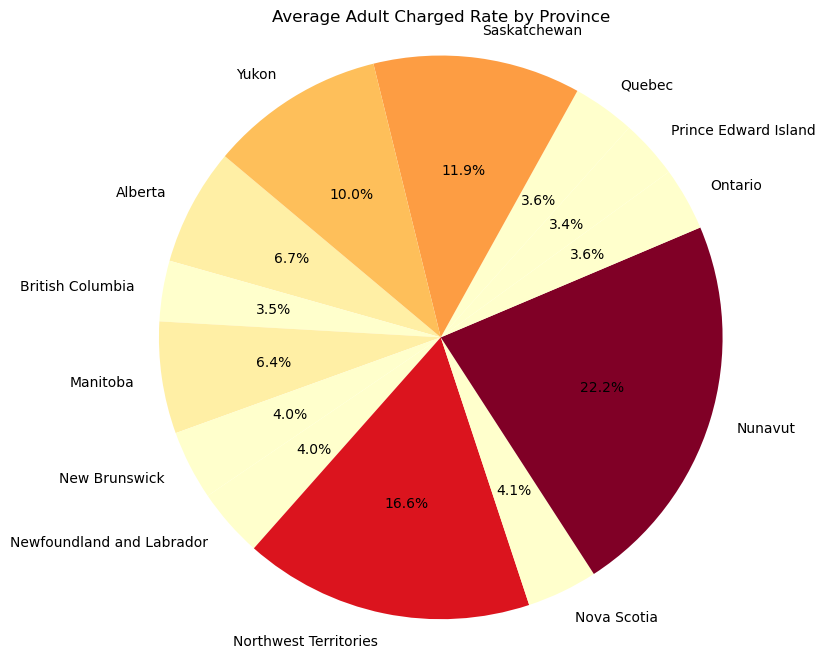

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for the "Rate, adult charged per 100,000 population aged 18 years and over" measure
rate_adult_charged = data[data['Measure'] == 'Rate, adult charged per 100,000 population aged 18 years and over']

# Calculate the internal average rate for each province over the 11-year period
internal_average_rate_per_province = rate_adult_charged.groupby('Province')['Value'].mean().reset_index()

# Normalize values for color mapping
normalized_values = (internal_average_rate_per_province['Value'] - internal_average_rate_per_province['Value'].min()) / (internal_average_rate_per_province['Value'].max() - internal_average_rate_per_province['Value'].min())

# Create a colormap with more levels of light yellow
color_map = plt.cm.get_cmap('YlOrRd', 10)  # 10 levels of light yellow

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(internal_average_rate_per_province['Value'], labels=internal_average_rate_per_province['Province'], autopct='%1.1f%%', startangle=140, colors=[color_map(value) for value in normalized_values])
plt.title('Average Adult Charged Rate by Province')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

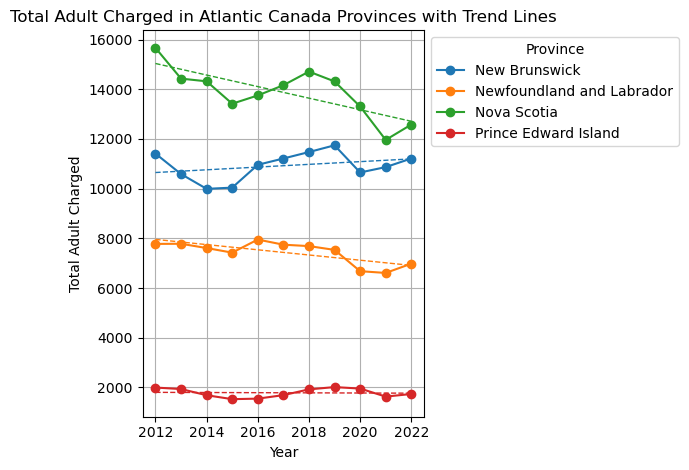

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter the data for the "Total, adult charged" measure and the Atlantic Canada provinces
atlantic_provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick']
total_adult_charged_atlantic = data[(data['Measure'] == 'Total, adult charged') & (data['Province'].isin(atlantic_provinces))]

# Group the data by Year and Province and sum the total adult charged
total_adult_charged_per_year = total_adult_charged_atlantic.groupby(['Year', 'Province'])['Value'].sum().reset_index()

# Pivot the data to have years as rows and provinces as columns
pivot_data = total_adult_charged_per_year.pivot(index='Year', columns='Province', values='Value')

# Create a line graph with trend lines
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='line', marker='o')
colors = [line.get_c() for line in ax.lines]

# Add trend lines
for idx, line in enumerate(ax.lines):
    x = line.get_xdata()
    y = line.get_ydata()
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), '--', color=colors[idx], linewidth=1)

plt.xlabel('Year')
plt.ylabel('Total Adult Charged')
plt.title('Total Adult Charged in Atlantic Canada Provinces with Trend Lines')
plt.legend(title='Province', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

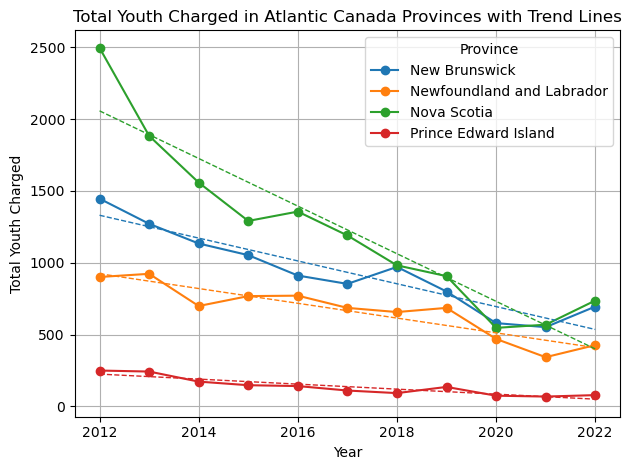

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter the data for the "Total, youth charged" measure and the Atlantic Canada provinces
atlantic_provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick']
total_youth_charged_atlantic = data[(data['Measure'] == 'Total, youth charged') & (data['Province'].isin(atlantic_provinces))]

# Group the data by Year and Province and sum the total youth charged
total_youth_charged_per_year = total_youth_charged_atlantic.groupby(['Year', 'Province'])['Value'].sum().reset_index()

# Pivot the data to have years as rows and provinces as columns
pivot_data = total_youth_charged_per_year.pivot(index='Year', columns='Province', values='Value')

# Create a line graph with trend lines
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='line', marker='o')
colors = [line.get_c() for line in ax.lines]

# Add trend lines
for idx, line in enumerate(ax.lines):
    x = line.get_xdata()
    y = line.get_ydata()
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), '--', color=colors[idx], linewidth=1)

plt.xlabel('Year')
plt.ylabel('Total Youth Charged')
plt.title('Total Youth Charged in Atlantic Canada Provinces with Trend Lines')
plt.legend(title='Province', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

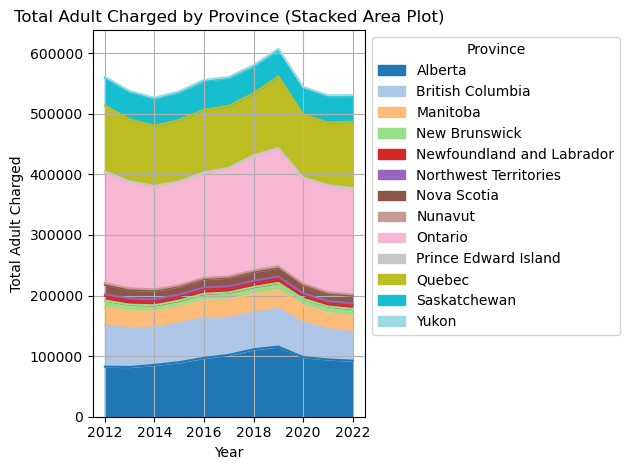

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter the data for the "Total, adult charged" measure
total_adult_charged = data[data['Measure'] == 'Total, adult charged']

# Pivot the data to have years as rows and provinces as columns
pivot_data = total_adult_charged.pivot(index='Year', columns='Province', values='Value')

# Create a stacked area plot with unique colors for each province
plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='area', stacked=True, cmap='tab20')
plt.xlabel('Year')
plt.ylabel('Total Adult Charged')
plt.title('Total Adult Charged by Province (Stacked Area Plot)')
plt.legend(title='Province', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
